In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# dectree = DecisionTreeClassifier(max_depth = 2)

In [2]:
data = pd.read_csv("GameData_cleaned.csv")
print(data)

       Unnamed: 0   appid                                          name  \
0               0  451450                       Hollywood Hills Mansion   
1               1  773620               Redemption: Tyranny of Daetorem   
2               2   37290                                      Zenerchi   
3               3  377340                          ChessBase 13 Academy   
4               4   40200                                     ItzaBitza   
...           ...     ...                                           ...   
41303       42293  567380                                    Heartbound   
41304       42294  599080                             The Blackout Club   
41305       42295  665180                                      Dark Elf   
41306       42296  387290  Ori and the Blind Forest: Definitive Edition   
41307       42297  791380                                       Way Out   

                                  developer  \
0                     LOOT Interactive, LLC   
1    

X=data[['positive', 'initialprice', 'total_lang','18+','Casual' , 'Indie', 'Free To Play', 'RPG' , 'Strategy' ,'Sports', 'Simulation'  , 'Racing','Massivley Multiplayer' ,'Act_Adv']]

y=data['owner_cat']

In [3]:
y = pd.DataFrame(data["owner_cat"])
x = pd.DataFrame(data[['positive', 'negative', 'initialprice', 'total_lang', '18+', 'Indie', 'Free To Play', 'RPG', 'Strategy', 'Sports', 'Simulation', 'Racing', 'Massivley Multiplayer', 'Act_Adv']])
#'positive', 'negative', 'initialprice', 'total_lang', '18+'
# , 'Indie', 'Free To Play', 'RPG', 'Strategy', 'Sports', 'Simulation', 'Racing', 'Massivley Multiplayer', 'Act_Adv'
print(y)

       owner_cat
0              0
1              0
2              0
3              0
4              0
...          ...
41303          3
41304          3
41305          1
41306          8
41307          3

[41308 rows x 1 columns]


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (30981, 1) (30981, 14)
Test Set  : (10327, 1) (10327, 14)


In [5]:
# y_train["owner_cat"].value_counts()
# x_train['initialprice'].value_counts()
# x_train[['positive', 'initialprice', 'total_lang', '18+', 'Indie', 'Free To Play', 'RPG']].value_counts()
# x_train[['Strategy', 'Sports', 'Simulation', 'Racing', 'Massivley Multiplayer', 'Act_Adv']].value_counts()


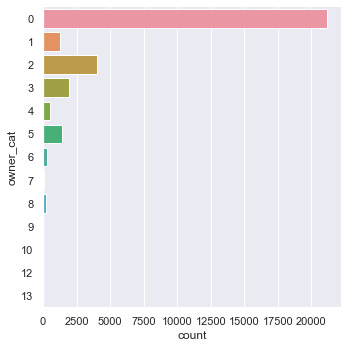

In [6]:
sb.catplot(y = "owner_cat", data = y_train, kind = "count")

<AxesSubplot:xlabel='owner_cat', ylabel='Count'>

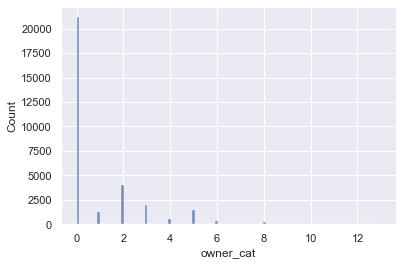

In [7]:
sb.histplot(data = y_train['owner_cat'])

In [8]:
# sb.boxplot(data = x_train['positive'], orient = "h")
# sb.histplot(data = x_train['total_lang'])
# sb.violinplot(data = x_train['positive'], orient = "h")

In [9]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([x_train, y_train], axis = 1).reindex(x_train.index)



In [10]:
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8081404731932474

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7557858042025758



<AxesSubplot:>

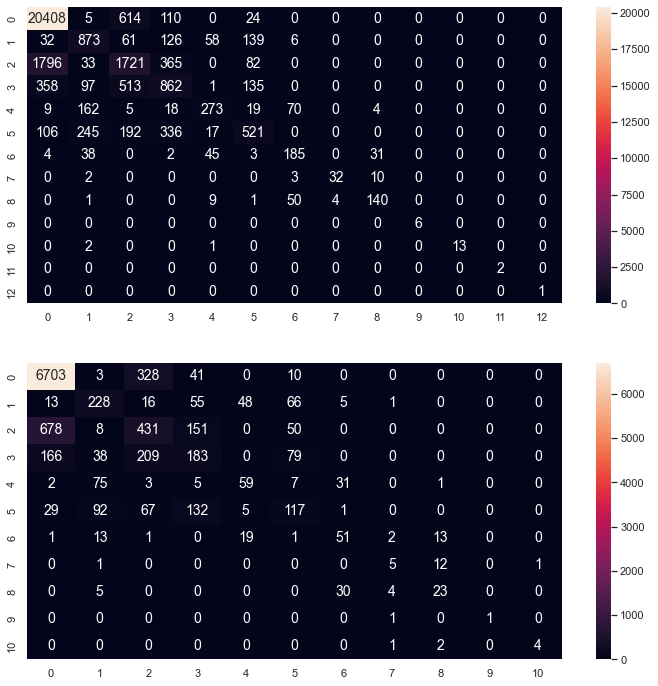

In [11]:
f, axes = plt.subplots(2, 1, figsize=(12, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1])

[Text(0.48496373398643555, 0.9545454545454546, 'negative <= 30.5\ngini = 0.508\nsamples = 30981\nvalue = [21161, 1295, 3997, 1966, 560, 1417, 308, 47, 205, 6\n16, 2, 1]\nclass = 0'),
 Text(0.2345751695553881, 0.8636363636363636, 'positive <= 46.5\ngini = 0.211\nsamples = 22365\nvalue = [19761, 33, 2049, 402, 9, 107, 4, 0, 0, 0, 0, 0\n0]\nclass = 0'),
 Text(0.12698992087415223, 0.7727272727272727, 'negative <= 10.5\ngini = 0.143\nsamples = 18892\nvalue = [17453, 28, 1153, 186, 6, 64, 2, 0, 0, 0, 0, 0\n0]\nclass = 0'),
 Text(0.06372456669178599, 0.6818181818181818, 'initialprice <= 0.45\ngini = 0.113\nsamples = 16134\nvalue = [15173, 19, 756, 130, 5, 50, 1, 0, 0, 0, 0, 0\n0]\nclass = 0'),
 Text(0.03711379050489827, 0.5909090909090909, 'positive <= 18.5\ngini = 0.23\nsamples = 2155\nvalue = [1879, 3, 209, 43, 3, 17, 1, 0, 0, 0, 0, 0, 0]\nclass = 0'),
 Text(0.021571213262999246, 0.5, 'positive <= 1.5\ngini = 0.199\nsamples = 1774\nvalue = [1581, 3, 144, 30, 1, 14, 1, 0, 0, 0, 0, 0, 0]\ncla

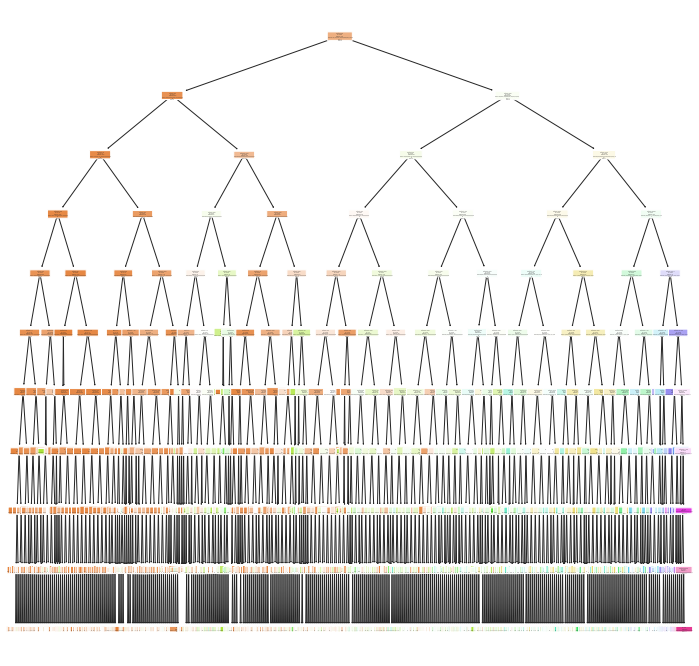

In [12]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["0","1","2","3", "4","5","6","7","8","9","10","11","12"])